In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy import stats

%matplotlib inline
train = pd.read_csv('train.csv')
train_sample = train.sample(train.shape[0]/2)
test = pd.read_csv('test.csv')

In [38]:
def remove_nas(dataframe, percent):
    null_data = dataframe.isnull().sum()
    data_to_remove = null_data[null_data > dataframe.shape[0]*percent].index.tolist()
    dataframe.drop(data_to_remove,1)
    return dataframe

In [39]:
def int_data(dataframe):
    data_type = dataframe.dtypes
    int_columns_1 = data_type[data_type=='int64'].index.tolist()
    int_columns_2 = data_type[data_type=='float64'].index.tolist()
    int_columns = int_columns_1 + int_columns_2
    int_dataframe = dataframe[int_columns]
    return int_dataframe

In [41]:
def process_data(dataframe):
    var = [e for e in dataframe.columns.values.tolist() if e not in ('Id', 'SalePrice')]
    independent_var = dataframe[var]
    independent_var['TotalSF'] = independent_var['1stFlrSF'] + independent_var['2ndFlrSF']+ independent_var['TotalBsmtSF']
    independent_var.drop(['1stFlrSF', '2ndFlrSF', 'TotalBsmtSF'],1, inplace=True)
    return independent_var

def graph_processed_data(dataframe, independent_var):
    num_col = independent_var.shape[1]
    graph_dimension = int(round(math.sqrt(num_col)))

    f, ax = plt.subplots(graph_dimension, graph_dimension,figsize=(18,12))
    plt.subplots_adjust( hspace=0.3 )
    plt.subplots_adjust( wspace=0.04 )

    y = dataframe['SalePrice']
    counter = 0

    list_of_predictors =[]

    for i in range(graph_dimension):
        for j in range(graph_dimension):
            ax[i][j].get_yaxis().set_ticks([])
            ax[i][j].get_xaxis().set_ticks([])
            if counter >= num_col:
                continue
            else:
                x = independent_var.iloc[:, counter]
                ax[i][j].scatter(x,y)
                ax[i][j].set_title(independent_var.columns.values[counter])
            
                slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
            
                if r_value**2 > 0.3:
                    list_of_predictors.append(independent_var.columns.values[counter])
                counter = counter + 1

    final_int_train = independent_var[list_of_predictors]
    return list_of_predictors, dataframe, final_int_train


/home/jen/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/jen/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


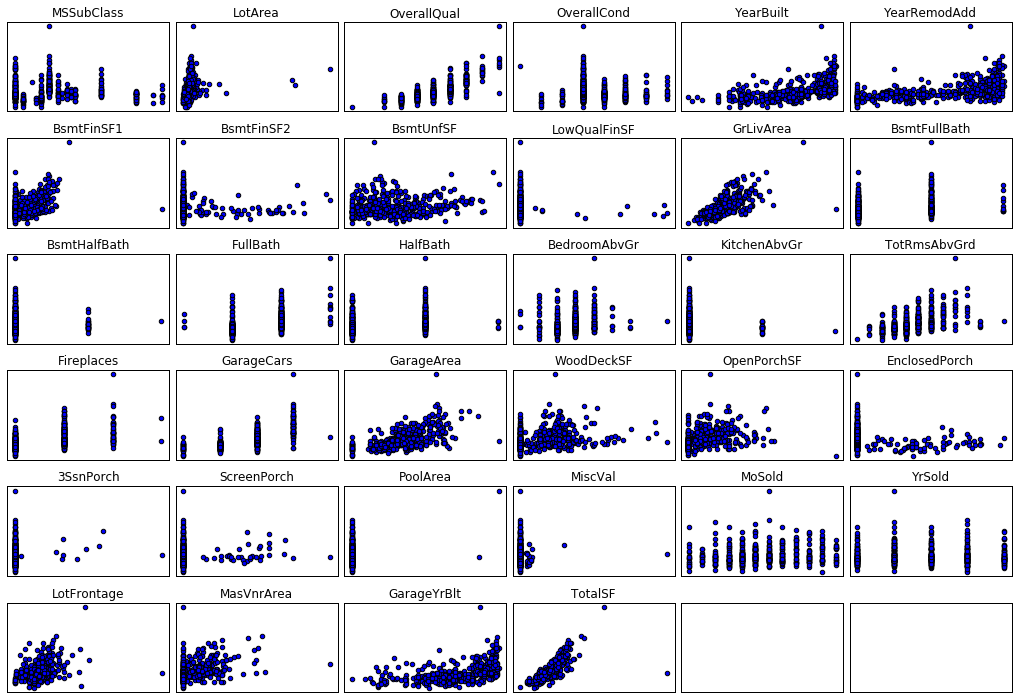

In [42]:
train_sample = train.sample(500)
no_na_train_sample = remove_nas(train_sample, .10)
numerical_train_sample = int_data(no_na_train_sample)
process_train_sample = process_data(numerical_train_sample)
list_of_predictors_train_sample, train_sample, final_train_sample = graph_processed_data(train_sample, process_train_sample)


/home/jen/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/jen/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


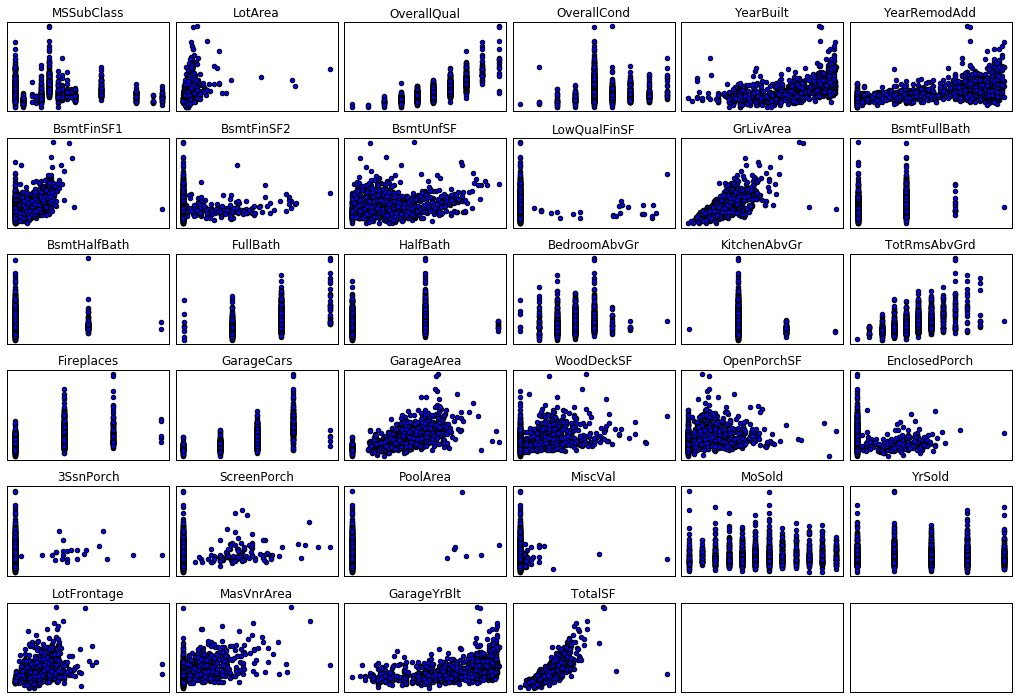

In [43]:
no_na_train = remove_nas(train, .10)
numerical_train = int_data(no_na_train)
process_train = process_data(numerical_train)
list_of_predictors_train, train, final_train = graph_processed_data(train, process_train)

In [44]:
no_na_test = remove_nas(test, .10)
numerical_test = int_data(no_na_test)
process_test = process_data(numerical_test)


In [45]:
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import StratifiedKFold



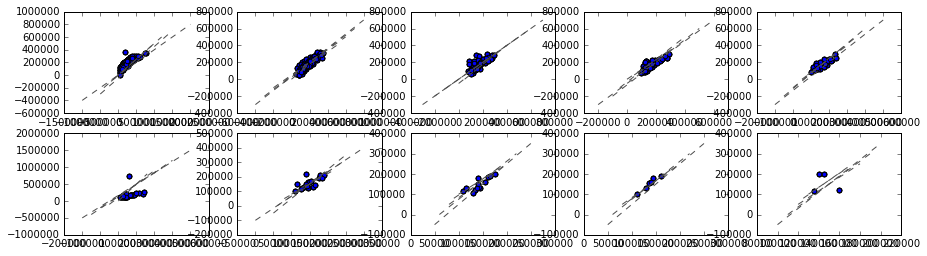

In [46]:
x_train, x_test, y_train, y_test = train_test_split(final_train.values, train['SalePrice'].as_matrix(), test_size=0.3)
k_fold = StratifiedKFold(y_train.ravel(), n_folds=10)

lr = linear_model.LinearRegression()
lr.fit(x_train,y_train.ravel().T)


times=5

f, ax = plt.subplots(2,5,figsize=(15, 4))

for i in range(times):
    counter = 0
    for train_indx, test_indx in k_fold:
        val_train_x, val_train_y =x_train[train_indx], y_train[train_indx]
        val_test_x, val_test_y = x_train[test_indx], y_train[test_indx]
        lr.fit(val_train_x, val_train_y.ravel().T)
        y_pred = lr.predict(val_test_x)
        ax[counter/5][counter % 5].scatter(val_test_y, y_pred)
        ax[counter/5][counter % 5].plot(ax[counter/5][counter % 5].get_xlim(), ax[counter/5][counter % 5].get_ylim(), ls="--", c=".3")
        counter += 1

In [47]:
lm = linear_model.LinearRegression()
lm.fit(final_train_sample.values, train_sample['SalePrice'])
lm.coef_

array([  2.32809981e+04,   1.97699563e+01,   2.34063171e+04,
        -6.46821276e+00,   2.12075659e+01])